In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Loading data
df = pd.read_csv('Student_Performance.csv')

In [50]:
# Defining x_train and y_train
X_train = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours','Sample Question Papers Practiced']]
y_train = df['Performance Index']
X_features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours','Sample Question Papers Practiced']

In [51]:
# Use only the first 2000 rows
df_subset = df.iloc[:2000]

# Define X and y using specific columns
X = df_subset[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
               'Sleep Hours', 'Sample Question Papers Practiced']]
y = df_subset['Performance Index']

# Split 1300 for training, 700 for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=1300, test_size=700, random_state=42
)

Text(0, 0.5, 'Performance')

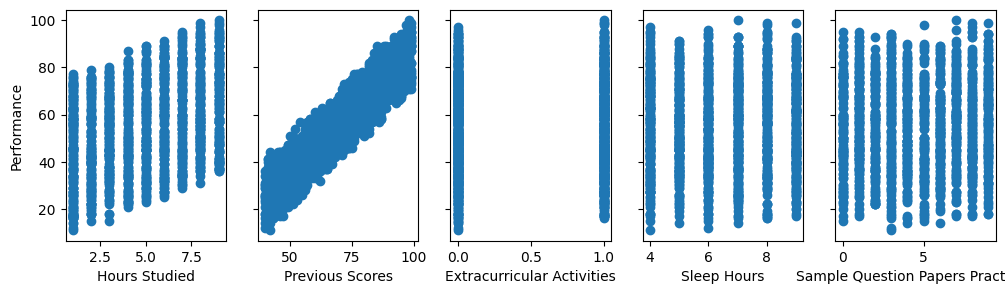

In [52]:
# Plot x_train and y_train    
fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train,)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Performance')

In [53]:
# Normalize the training data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

Text(0, 0.5, 'Performance')

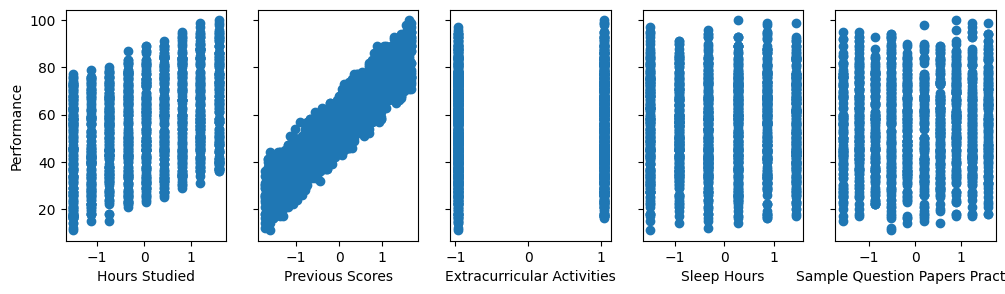

In [54]:
# Plot the X_train_norm 
fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_norm[:,i],y_train,)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Performance')

In [55]:
# Create and fit the regression model
sgdr = SGDRegressor(max_iter = 2000)
sgdr.fit(X_train_norm, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [56]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(b_norm)
print(w_norm)

[55.30096391]
[ 7.3856134  17.79593127  0.25511081  0.8325124   0.57454132]


In [57]:
y_pred = np.dot(X_train_norm, w_norm) +  b_norm

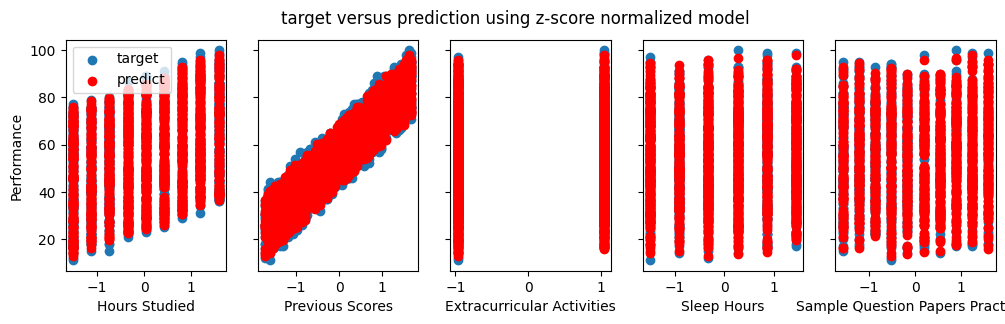

In [58]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_norm[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train_norm[:,i],y_pred,color='r', label = 'predict')
ax[0].set_ylabel("Performance"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Text(0, 0.5, 'Performance')

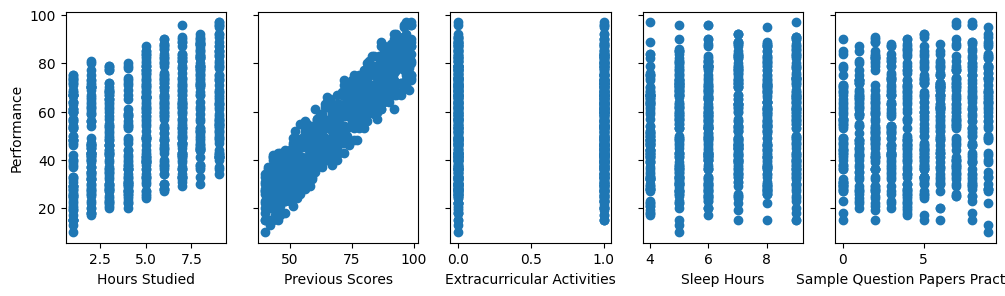

In [64]:
# Plot x_test and y_test 
fig,ax=plt.subplots(1,5,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test.iloc[:,i],y_test,)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Performance')

In [68]:
X_test_norm = scaler.fit_transform(X_test)
y_test_pred = sgdr.predict(X_test_norm)

In [70]:
# Evaluate 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {r2:.4f}")

Test MSE: 4.93
Test R² Score: 0.9872


In [75]:
# Predict an entered data:
new_student_df = pd.DataFrame([[8, 80, 1, 9, 5]], columns=X_features)
new_student_norm = scaler.transform(new_student_df)
prediction = sgdr.predict(new_student_norm)

print(f"Predicted Performance Index: {prediction[0]:.2f}")


Predicted Performance Index: 76.91
